>> **Multiclass classification of the Fashion-MNIST dataset using Convolutional Neural Networks (CNN)**

**Downloading the necesssary libraries**

In [25]:
# The exclamation mark at the start of a cell allows to run a shell command, and pip is the Python package installer that allows to install Python libraries.
!pip install torch
!pip install torchvision
!pip install matplotlib

**Importing the libraries**

In [5]:
import matplotlib
import torch
import torchvision


from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
from torchvision import transforms
import torchvision.datasets as dsets
from matplotlib.pyplot import imshow
import matplotlib.pylab as plt

**Loading the dataset**

In [6]:
# Defining the shape of the image
image_row = 16
image_column = 16

# Compose method allows to transform the dataset to a from we need
composed = transforms.Compose([transforms.Resize((image_row, image_column)), transforms.ToTensor()])

**Creating training and testing datasets**

In [25]:
dataset_train = dsets.FashionMNIST(root='.fashion/data_train', train = True, download = True, transform = composed)
dataset_test = dsets.FashionMNIST(root='.fashion/data_test', train=False, download=True, transform=composed)

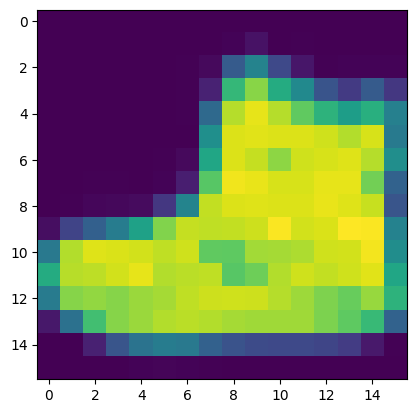

In [15]:
# Showing the first image in a training dataset
plt.imshow(dataset_train[0][0][0])
plt.show()

**Creating CNN class with Batch Normalization**

In [16]:
class CNN_batch(nn.Module):
    
    # Contructor
    def __init__(self, out_1=16, out_2=32, number_of_classes=10):
        super(CNN_batch, self).__init__()
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=out_1, kernel_size=5, padding=2)
        self.conv1_bn = nn.BatchNorm2d(out_1)

        self.maxpool1=nn.MaxPool2d(kernel_size=2)
        
        self.cnn2 = nn.Conv2d(in_channels=out_1, out_channels=out_2, kernel_size=5, stride=1, padding=2)
        self.conv2_bn = nn.BatchNorm2d(out_2)

        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(out_2 * 4 * 4, number_of_classes)
        self.bn_fc1 = nn.BatchNorm1d(10)
    
    # Prediction
    def forward(self, x):
        x = self.cnn1(x)
        x = self.conv1_bn(x)
        x = torch.relu(x)
        x = self.maxpool1(x)
        x = self.cnn2(x)
        x = self.conv2_bn(x)
        x = torch.relu(x)
        x = self.maxpool2(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.bn_fc1(x)
        
        return x

**Training the model**

In [20]:
# Train and test Loaders
train_loader = torch.utils.data.DataLoader(dataset=dataset_train, batch_size=50)
test_loader = torch.utils.data.DataLoader(dataset=dataset_test, batch_size=50)

In [21]:
# Defining the model
model = CNN_batch(out_1=16, out_2=32, number_of_classes=10)

In [22]:
# Creating objects for Loss function and the optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum = 0.9)

In [23]:
# Model Training
import time
start_time = time.time()

cost_list=[]
accuracy_list=[]
N_test=len(dataset_test)
n_epochs=20

for epoch in range(n_epochs):
    cost=0
    model.train()
    for x, y in train_loader:
        optimizer.zero_grad()
        z = model(x)
        loss = criterion(z, y)
        loss.backward()
        optimizer.step()
        cost+=loss.item()
    correct=0
    
    # Prediction on testing data 
    model.eval()
    for x_test, y_test in test_loader:
        z = model(x_test)
        _, yhat = torch.max(z.data, 1)
        correct += (yhat == y_test).sum().item()
    accuracy = correct / N_test
    accuracy_list.append(accuracy)
    cost_list.append(cost)
    

**Plotting the Cost and Accuracy**

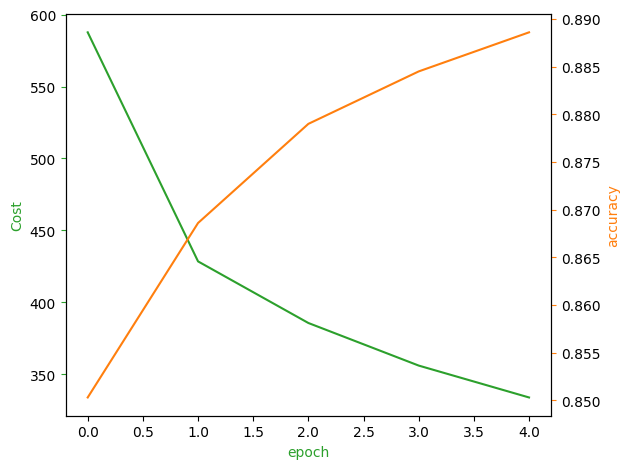

In [24]:
fig, ax1 = plt.subplots()
color = 'tab:green'
ax1.plot(cost_list, color=color)
ax1.set_xlabel('epoch', color=color)
ax1.set_ylabel('Cost', color=color)
ax1.tick_params(axis='y', color=color)
    
ax2 = ax1.twinx()  
color = 'tab:orange'
ax2.set_ylabel('accuracy', color=color) 
ax2.set_xlabel('epoch', color=color)
ax2.plot( accuracy_list, color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()